# Predição de indicadores de saúde para diabetes

## De onde veio os dados.

O Behavioral Risk Factor Surveillance System (BRFSS) é uma pesquisa telefônica relacionada à saúde coletada anualmente pelo CDC. A cada ano, a pesquisa coleta respostas de mais de 400.000 americanos sobre comportamentos de risco relacionados à saúde, condições crônicas de saúde e uso de serviços preventivos. Ela é realizada todos os anos desde 1984. Para este projeto, foi usado um csv do conjunto de dados disponível no Kaggle para o ano de 2015.

## Dicionário dos Dados

### Variáveis

1. **Diabetes_012**:  
   Variável alvo que indica o estado do diabetes:  
   - 0: Sem diabetes.  
   - 1: Pré-diabetes.  
   - 2: Diabetes diagnosticada.  

2. **HighBP**:  
   Diagnóstico de hipertensão arterial:  
   - 0: Não.  
   - 1: Sim.  

3. **HighChol**:  
   Diagnóstico de colesterol alto:  
   - 0: Não.  
   - 1: Sim.  

4. **CholCheck**:  
   Realização de exame de colesterol nos últimos 5 anos:  
   - 0: Não.  
   - 1: Sim.  

5. **BMI**:  
   Índice de Massa Corporal (IMC), métrica contínua.  

6. **Smoker**:  
   Status de fumante atual:  
   - 0: Não.  
   - 1: Sim.  

7. **Stroke**:  
   Histórico de derrame:  
   - 0: Não.  
   - 1: Sim.  

8. **HeartDiseaseorAttack**:  
   Histórico de ataque cardíaco ou doença cardiovascular:  
   - 0: Não.  
   - 1: Sim.  

9. **PhysActivity**:  
   Prática regular de atividade física:  
   - 0: Não.  
   - 1: Sim.  

10. **Fruits**:  
    Consumo de frutas ao menos uma vez por dia:  
    - 0: Não.  
    - 1: Sim.  

11. **Veggies**:  
    Consumo de vegetais ao menos uma vez por dia:  
    - 0: Não.  
    - 1: Sim.  

12. **HvyAlcoholConsump**:  
    Consumo excessivo de álcool (homens: >14 doses/semana, mulheres: >7 doses/semana):  
    - 0: Não.  
    - 1: Sim.  

13. **AnyHealthcare**:  
    Acesso a qualquer tipo de assistência médica:  
    - 0: Não.  
    - 1: Sim.  

14. **NoDocbcCost**:  
    Impossibilidade de consultar um médico devido ao custo:  
    - 0: Não.  
    - 1: Sim.  

15. **GenHlth**:  
    Autoavaliação da saúde geral:  
    - 1: Excelente.  
    - 2: Muito boa.  
    - 3: Boa.  
    - 4: Regular.  
    - 5: Ruim.  

16. **MentHlth**:  
    Número de dias, nos últimos 30, em que a saúde mental foi considerada ruim (0-30).  

17. **PhysHlth**:  
    Número de dias, nos últimos 30, em que a saúde física foi considerada ruim (0-30).  

18. **DiffWalk**:  
    Dificuldade para caminhar ou se locomover:  
    - 0: Não.  
    - 1: Sim.  

19. **Sex**:  
    Sexo biológico:  
    - 0: Masculino.  
    - 1: Feminino.  

20. **Age**:  
    Faixa etária:  
    - 1: 18-24 anos.  
    - 2: 25-29 anos.  
    - 3: 30-34 anos.  
    - ...  
    - 13: 80 anos ou mais.  

21. **Education**:  
    Nível educacional:  
    - 1: Ensino fundamental incompleto.  
    - 2: Ensino fundamental completo.  
    - 3: Ensino médio incompleto.  
    - 4: Ensino médio completo.  
    - 5: Ensino superior incompleto.  
    - 6: Ensino superior completo.  

22. **Income**:  
    Faixa de renda anual:  
    - 1: Menos de $10.000.  
    - 2: $10.000 a $15.000.  
    - 3: $15.000 a $20.000.  
    - ...  
    - 8: $75.000 ou mais.  

In [1]:
!pip install imblearn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Pichau\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [ ]:
# Importar bilbiotecas
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carregar os dados 
df = pd.read_csv("../data/diabetes_012_health_indicators_BRFSS2015.csv")

In [4]:
# Verificação dos tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
# Lista das colunas categóricas
categorical_columns = [
    'Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
    'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
    'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
    'DiffWalk', 'Sex', 'Age','Education', 'Income'
]

# Converter as colunas categóricas para o tipo 'cate3gory'
#df[categorical_columns] = df[categorical_columns].astype('category')

for col in df.columns:
    df[col] = df[col].astype('int')

In [6]:
df.duplicated().sum()

np.int64(23899)

In [7]:
df = df.drop_duplicates()

In [8]:
# Visualização do dataset
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


## Análise dos dados

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2684342916.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sem Diabetes', 'Pré-diabete',  'Com Diabetes'])


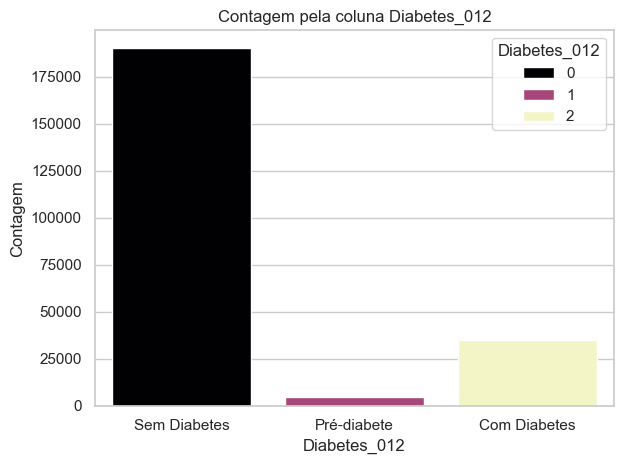

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2684342916.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sem Diabetes', 'Pré-diabete',  'Com Diabetes'])


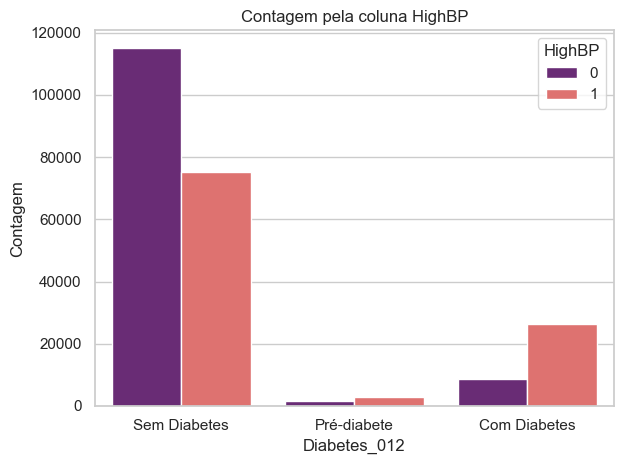

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2684342916.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sem Diabetes', 'Pré-diabete',  'Com Diabetes'])


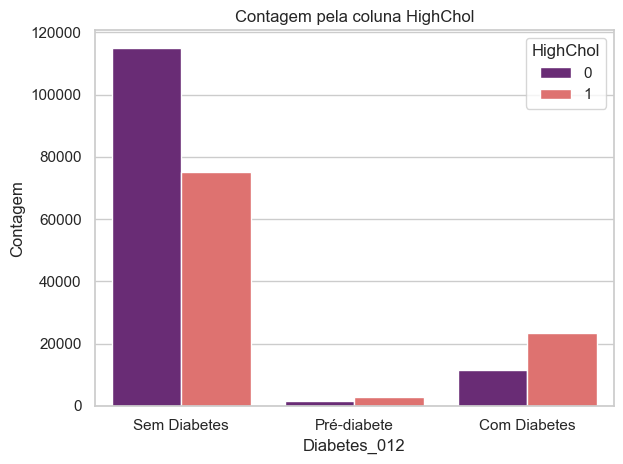

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2684342916.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sem Diabetes', 'Pré-diabete',  'Com Diabetes'])


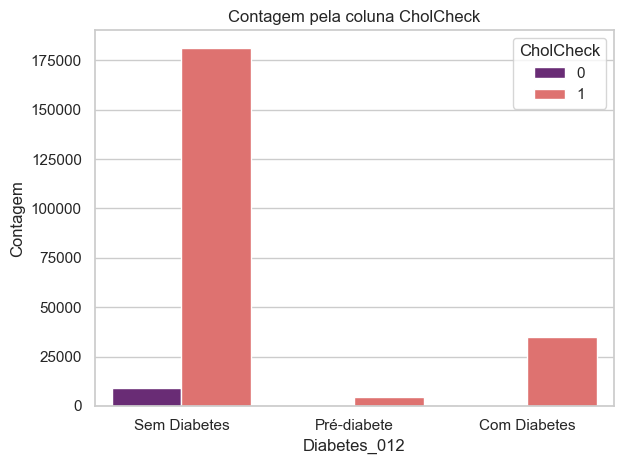

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2684342916.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sem Diabetes', 'Pré-diabete',  'Com Diabetes'])


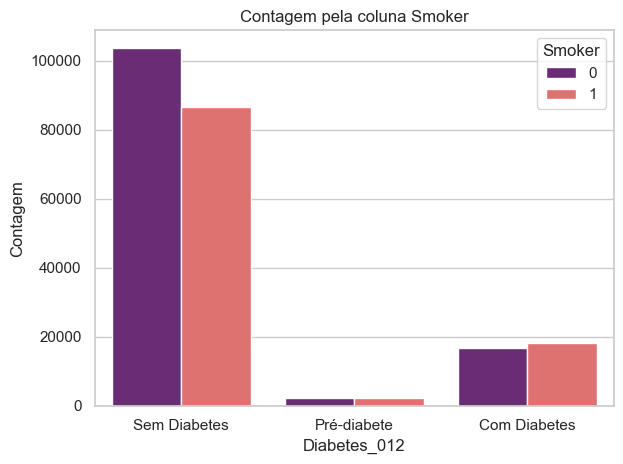

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2684342916.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sem Diabetes', 'Pré-diabete',  'Com Diabetes'])


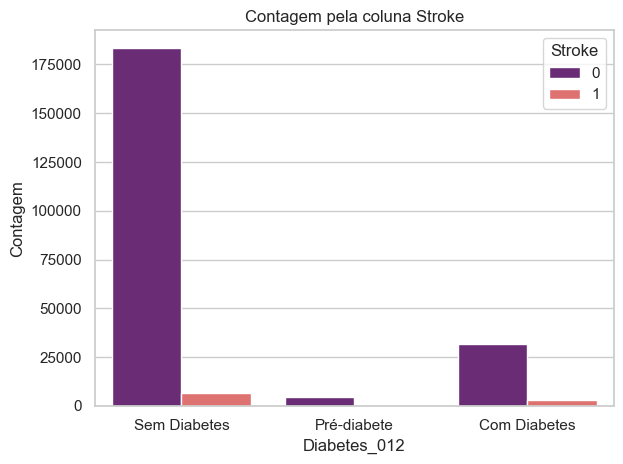

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2684342916.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sem Diabetes', 'Pré-diabete',  'Com Diabetes'])


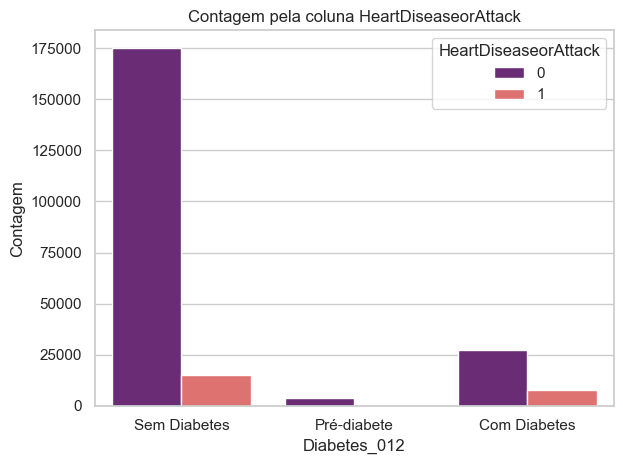

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2684342916.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sem Diabetes', 'Pré-diabete',  'Com Diabetes'])


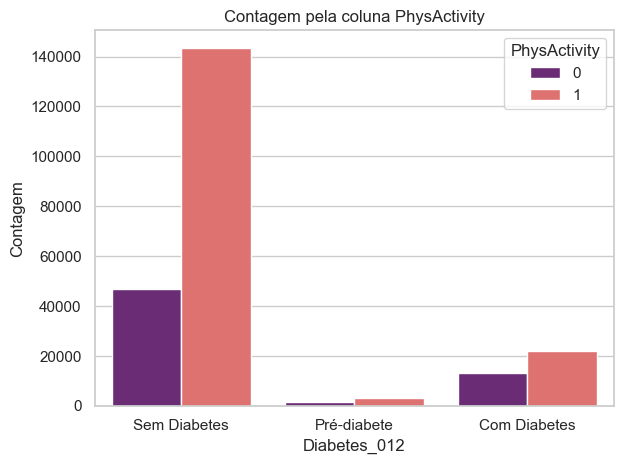

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2684342916.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sem Diabetes', 'Pré-diabete',  'Com Diabetes'])


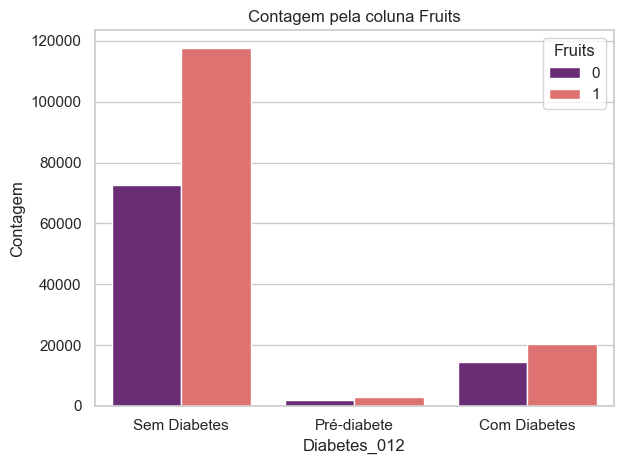

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2684342916.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sem Diabetes', 'Pré-diabete',  'Com Diabetes'])


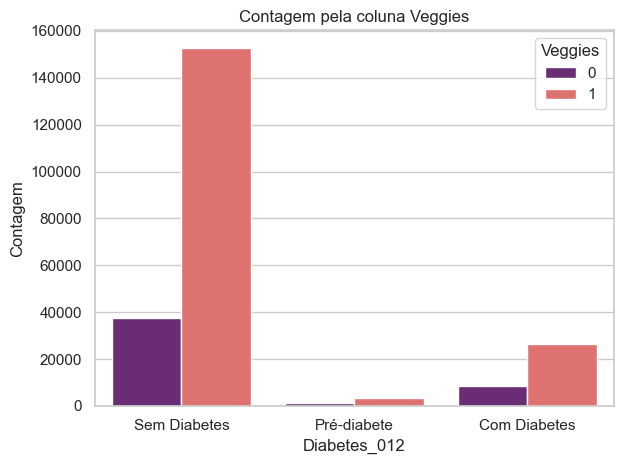

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2684342916.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sem Diabetes', 'Pré-diabete',  'Com Diabetes'])


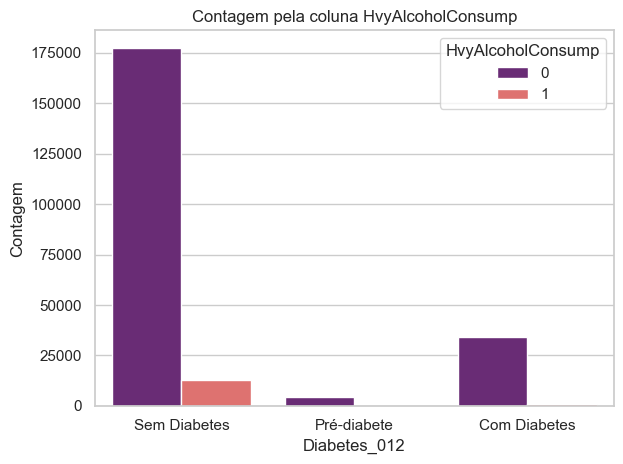

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2684342916.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sem Diabetes', 'Pré-diabete',  'Com Diabetes'])


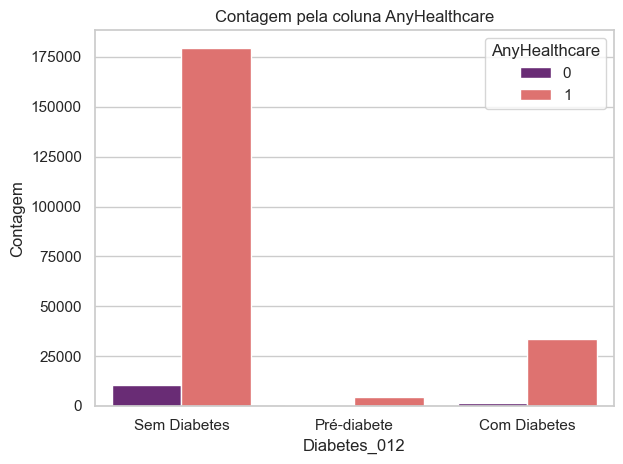

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2684342916.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sem Diabetes', 'Pré-diabete',  'Com Diabetes'])


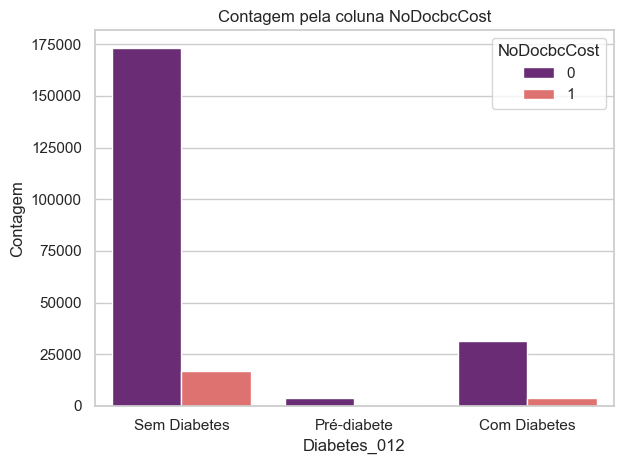

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2684342916.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sem Diabetes', 'Pré-diabete',  'Com Diabetes'])


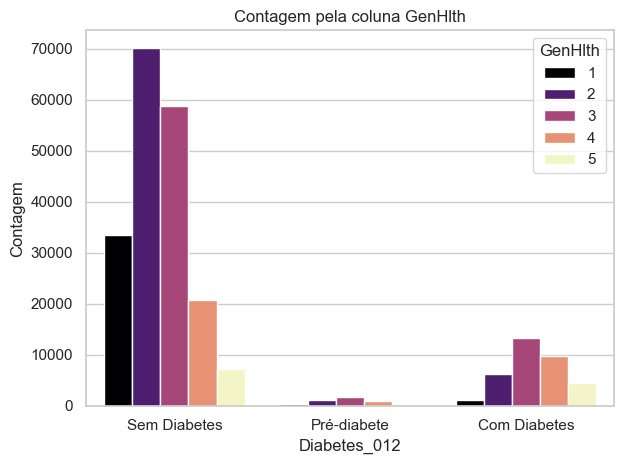

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2684342916.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sem Diabetes', 'Pré-diabete',  'Com Diabetes'])


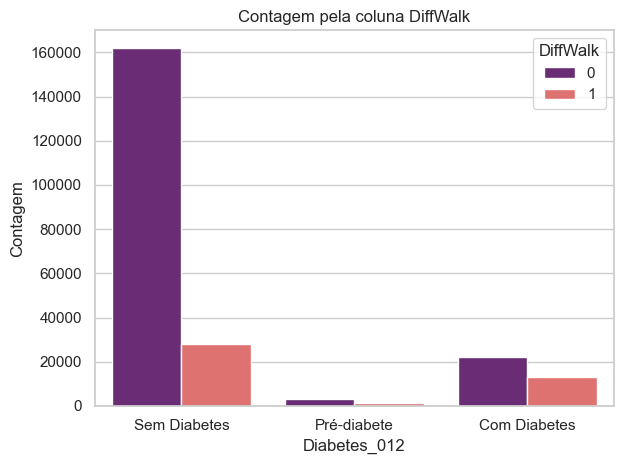

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2684342916.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sem Diabetes', 'Pré-diabete',  'Com Diabetes'])


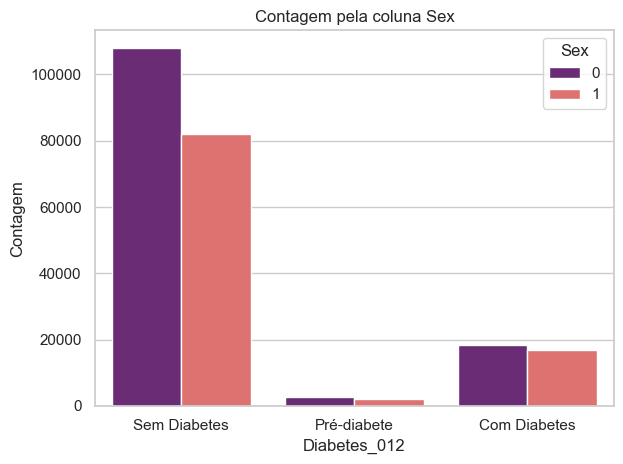

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2684342916.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sem Diabetes', 'Pré-diabete',  'Com Diabetes'])


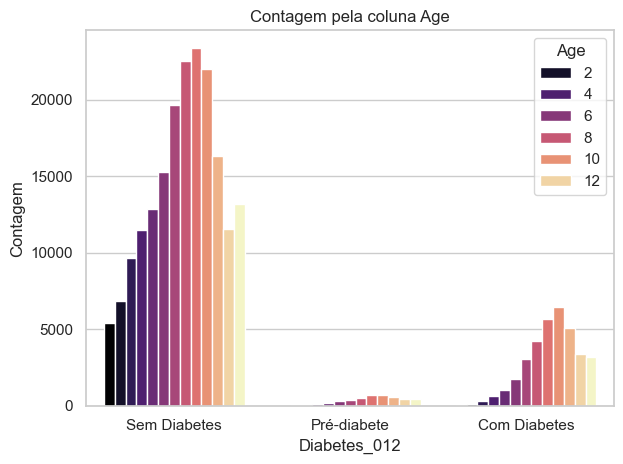

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2684342916.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sem Diabetes', 'Pré-diabete',  'Com Diabetes'])


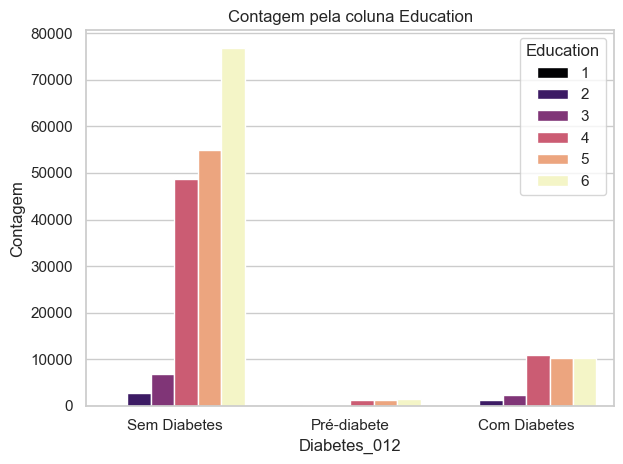

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2684342916.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sem Diabetes', 'Pré-diabete',  'Com Diabetes'])


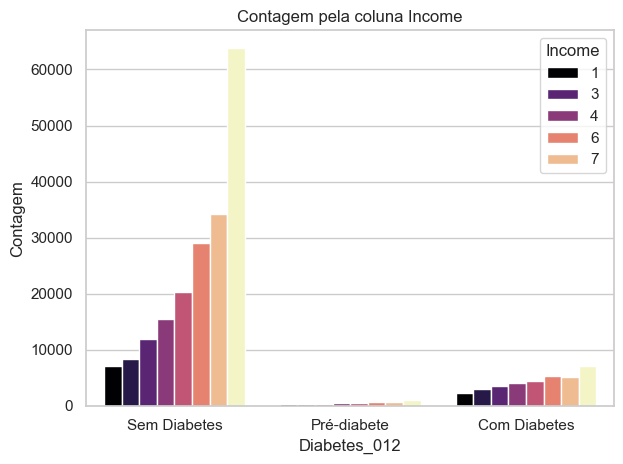

In [9]:
# Estilo do gráfico
sns.set_theme(style="whitegrid")

# Cria grafico de barras para cada coluna categórica
for column in categorical_columns:
    ax = sns.countplot(data=df, x='Diabetes_012', hue=column, palette='magma')
    ax.set(title=f'Contagem pela coluna {column}', ylabel='Contagem')
    ax.set_xticklabels(['Sem Diabetes', 'Pré-diabete',  'Com Diabetes'])
    ax.legend(title=column)

    plt.tight_layout()
    plt.show()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2864744836.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Diabete")


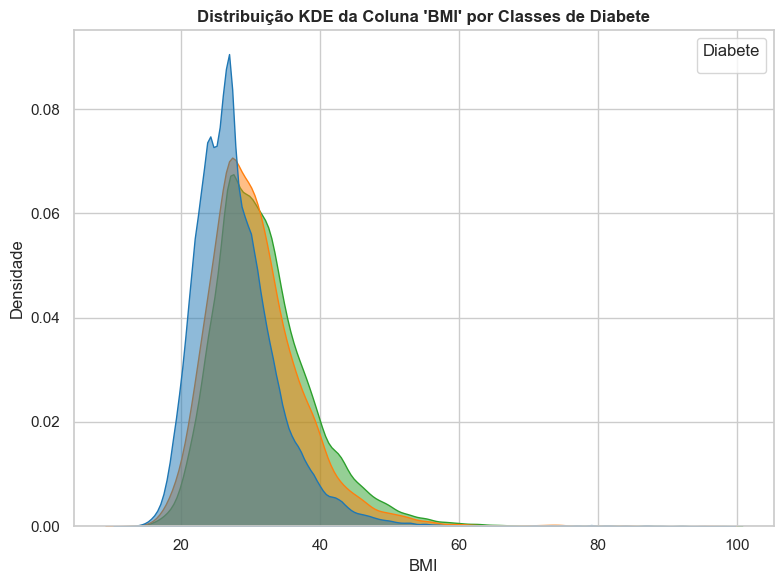

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2864744836.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Diabete")


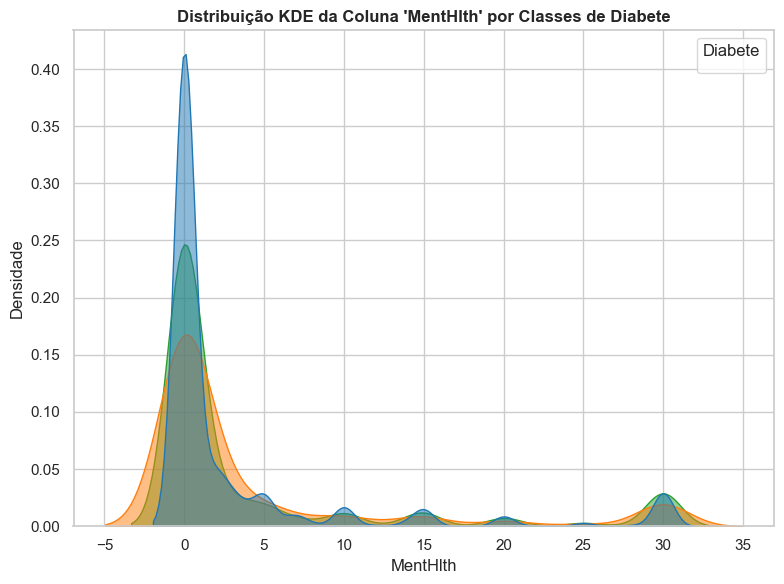

C:\Users\Pichau\AppData\Local\Temp\ipykernel_6252\2864744836.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Diabete")


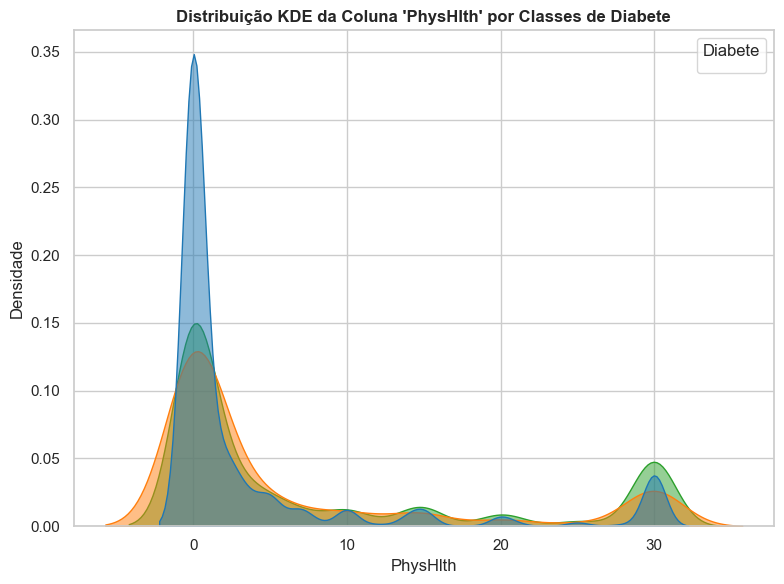

In [10]:
import seaborn as sns

for column in df.columns:
    if column not in categorical_columns and column != 'Diabetes_012':
        plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
        
        # Gráfico KDE para cada classe da coluna 'diabete'
        sns.kdeplot(
            data=df, 
            x=column, 
            hue='Diabetes_012',  # Coluna usada para diferenciar as classes
            fill=True,  # Preenchimento sob as curvas
            alpha=0.5,  # Transparência
            common_norm=False,  # Desativa normalização comum entre as classes
            palette="tab10"  # Paleta de cores
        )
        
        plt.title(f"Distribuição KDE da Coluna '{column}' por Classes de Diabete", fontweight='bold')
        plt.xlabel(column)
        plt.ylabel("Densidade")
        plt.legend(title="Diabete")
        plt.tight_layout()
        plt.show()


## Balanceamento de dados com undersampling

In [11]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle

# Dividir em recursos (X) e alvo (y)
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Determinar o número de amostras por classe
desired_samples_per_class = 334  # Número desejado de amostras

# Obter as classes únicas
classes = y_train.unique()
sampling_strategy = {cls: min(desired_samples_per_class, sum(y_train == cls)) for cls in classes}

# Realizar o undersampling no conjunto de treino
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

# Embaralhar os dados balanceados
X_train_balanced, y_train_balanced = shuffle(X_train_balanced, y_train_balanced, random_state=42)

# Verificar a distribuição das classes após o balanceamento
print("Antes do balanceamento:", y_train.value_counts())
print("Depois do balanceamento:", pd.Series(y_train_balanced).value_counts())


Antes do balanceamento: Diabetes_012
0    152043
2     28078
1      3703
Name: count, dtype: int64
Depois do balanceamento: Diabetes_012
1    334
2    334
0    334
Name: count, dtype: int64


In [12]:
X_train_balanced

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
252761,1,1,1,28,0,0,1,0,0,1,...,1,0,4,0,6,0,0,11,3,1
136497,1,1,1,34,1,0,0,1,1,0,...,1,0,2,0,2,0,1,9,5,8
107456,1,1,1,38,1,0,0,1,1,1,...,1,0,3,10,0,0,1,10,4,6
23530,0,0,0,29,1,0,0,0,0,1,...,0,0,3,0,0,0,1,8,4,4
251153,1,0,1,32,0,0,0,0,0,1,...,1,0,3,0,0,0,0,11,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82351,0,1,1,32,1,0,0,1,1,1,...,1,0,3,0,30,1,0,8,4,7
87338,1,1,1,35,1,0,0,1,1,1,...,1,0,4,0,0,0,1,10,6,8
120644,1,1,1,53,0,0,0,0,0,0,...,0,0,3,0,3,1,0,9,4,3
85762,1,1,1,36,0,0,0,1,1,1,...,1,0,3,0,4,0,0,7,4,8


In [13]:
y_train_balanced

252761    1
136497    2
107456    2
23530     1
251153    1
         ..
82351     0
87338     0
120644    2
85762     1
150381    0
Name: Diabetes_012, Length: 1002, dtype: int64

In [14]:
X_train_balanced_list = X_train_balanced.values.tolist()
y_train_balanced_list = y_train_balanced.values.tolist()

In [ ]:
X_train_balanced_array = np.array(X_train_balanced)

[1, 1, 1, 28, 0]
[1, 1, 1, 34, 1]
[1, 1, 1, 38, 1]
[0, 0, 0, 29, 1]
[1, 0, 1, 32, 0]
[1, 0, 1, 24, 0]
[1, 1, 1, 28, 1]
[0, 0, 1, 30, 0]
[1, 1, 1, 53, 1]
[0, 0, 1, 34, 0]
[1, 1, 1, 32, 1]
[0, 1, 1, 24, 1]
[0, 0, 1, 44, 0]
[1, 1, 1, 27, 1]
[1, 1, 1, 37, 0]
[0, 1, 1, 43, 1]
[0, 1, 1, 19, 1]
[1, 0, 1, 34, 0]
[1, 1, 1, 25, 0]
[0, 0, 1, 26, 1]
[1, 0, 1, 45, 0]
[0, 0, 1, 38, 0]
[1, 0, 1, 21, 0]
[1, 1, 1, 52, 0]
[1, 1, 1, 29, 1]
[0, 1, 1, 41, 0]
[0, 0, 1, 30, 0]
[1, 1, 1, 23, 1]
[1, 1, 1, 33, 1]
[1, 1, 1, 26, 0]
[0, 1, 1, 29, 1]
[0, 1, 1, 28, 0]
[1, 1, 1, 43, 1]
[1, 1, 1, 33, 0]
[1, 0, 0, 27, 1]
[1, 1, 1, 33, 1]
[1, 1, 1, 27, 1]
[0, 1, 1, 28, 1]
[1, 1, 1, 24, 0]
[0, 0, 1, 25, 0]
[0, 0, 0, 36, 0]
[1, 0, 1, 30, 0]
[0, 0, 1, 23, 1]
[0, 0, 1, 30, 1]
[0, 1, 1, 42, 0]
[0, 0, 1, 46, 0]
[0, 0, 1, 33, 0]
[1, 1, 1, 27, 1]
[1, 0, 1, 28, 0]
[1, 1, 1, 28, 0]
[1, 1, 1, 24, 1]
[1, 1, 1, 27, 0]
[1, 0, 1, 41, 1]
[0, 1, 1, 41, 1]
[0, 0, 1, 20, 0]
[0, 0, 1, 19, 1]
[0, 0, 1, 35, 1]
[0, 1, 1, 24, 0]
[1, 1, 1, 24, 

In [19]:
from models import MLP
from loss import categorical_cross_entropy, mse
from nn import tanh, relu, sigmoid, softmax
from metrics import sse

In [20]:
model = MLP(5, [4, 3], activation_fn=sigmoid)

EPOCHS = 5
LR = 0.01

for epoch in range(EPOCHS):
    y_pred = [model(x) for x in X_train_balanced_array[:,:5].tolist()]
    print(f"ypred: {y_pred}")

    loss = categorical_cross_entropy(y_train_balanced_list, y_pred)

    for p in model.parameters():
        p.grad = 0

    loss.backward()

    for p in model.parameters():
        p.data -= LR * p.grad

    if epoch % 5 == 0:
        print(f"Epoch {epoch} Loss: {loss.data}")

ypred: [[Value(data=0.2332115355644975, grad=0.0), Value(data=0.5685189247794199, grad=0.0), Value(data=0.41055693062563037, grad=0.0)], [Value(data=0.22985345042798244, grad=0.0), Value(data=0.5552490786460595, grad=0.0), Value(data=0.38511220515372574, grad=0.0)], [Value(data=0.22955935611301082, grad=0.0), Value(data=0.5540762767346538, grad=0.0), Value(data=0.3828988281228869, grad=0.0)], [Value(data=0.22514995340286276, grad=0.0), Value(data=0.5362976846394805, grad=0.0), Value(data=0.35010413394409107, grad=0.0)], [Value(data=0.23198487422554523, grad=0.0), Value(data=0.5636986845861374, grad=0.0), Value(data=0.4012309844700176, grad=0.0)], [Value(data=0.2324763206256337, grad=0.0), Value(data=0.5656275383452356, grad=0.0), Value(data=0.4049520969513507, grad=0.0)], [Value(data=0.23028795105253647, grad=0.0), Value(data=0.5569780816178381, grad=0.0), Value(data=0.3883861131880864, grad=0.0)], [Value(data=0.23060173161034492, grad=0.0), Value(data=0.5582255625488483, grad=0.0), Va